The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cabData_df = pd.read_csv("dataset/Cab_Data.csv")

In [3]:
cabData_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [48]:
cabData_df["profit"] = cabData_df["Price Charged"]-cabData_df["Cost of Trip"]

In [52]:
cabData_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


dfTransaction = pd.read_csv("dataset/Transaction_ID.csv")

In [53]:
dfTransaction = pd.read_csv("dataset/Transaction_ID.csv")

In [54]:
dfTransaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [55]:
dfTransaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [56]:
dfCustomer = pd.read_csv("dataset/Customer_ID.csv")

In [57]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [58]:

dfCustomer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [59]:
dfCutmerTransactionMerger=pd.merge(dfTransaction,dfCustomer,on="Customer ID")

In [60]:
dfCutmerTransactionMerger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  object
 3   Gender              440098 non-null  object
 4   Age                 440098 non-null  int64 
 5   Income (USD/Month)  440098 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [61]:
dfCutmerTransactionMerger.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [62]:
dfCutmerTransactionMerger.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [63]:
dfCustomerTransactionCabMerger = pd.merge(dfCutmerTransactionMerger,cabData_df,on="Transaction ID")

In [64]:
dfCustomerTransactionCabMerger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  profit              359392 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 38.4+ MB


In [65]:
dfCustTransCabCityMerger = pd.merge(dfCustomerTransactionCabMerger,dfCity,on="City")

In [66]:
dfCustTransCabCityMerger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  profit              359392 non-null  float64
 13  Population          359392 non-null  object 
 14  Users               359392 non-null  object 
dtypes: float64(4), int64(5), object(6)

In [67]:
dfCustTransCabCityMerger.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
profit                0
Population            0
Users                 0
dtype: int64

In [78]:
dfCustTransCabCityMerger["Income (USD/Month)"].min()

2000

In [79]:
dfCustTransCabCityMerger["Income (USD/Month)"].max()

35000

In [80]:
dfCustTransCabCityMerger["Income (USD/Month)"].mean()

15048.822937071498

In [83]:
def convertIncome(x):
    if x>=0 and x<=7000:
        return "0-7k"
    elif x>7000 and x<=14000:
        return "7k-14k"
    elif x>14000 and x<=21000:
        return "14k-21k"
    elif x>21000 and x<=28000:
        return "21k-28k"
    else:
        return "28k-35k"

In [84]:
dfCustTransCabCityMerger["Income range (USD/Month)"]=dfCustTransCabCityMerger["Income (USD/Month)"].apply(convertIncome)

In [85]:
dfCustTransCabCityMerger

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Population,Users,Income range (USD/Month)
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",7k-14k
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,"814,885","24,701",7k-14k
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,"814,885","24,701",7k-14k
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",7k-14k
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,"814,885","24,701",7k-14k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,Female,29,6829,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,"418,859","127,001",0-7k
359388,10319775,51406,Cash,Female,29,6829,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,"418,859","127,001",0-7k
359389,10347676,51406,Card,Female,29,6829,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,"418,859","127,001",0-7k
359390,10358624,51406,Cash,Female,29,6829,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,"418,859","127,001",0-7k


In [90]:
dfCustTransCabCityMerger.groupby(by="Company").mean()

,Transaction ID,Customer ID,Age,Income (USD/Month),Date of Travel,KM Travelled,Price Charged,Cost of Trip,profit
Company,,,,,,,,,
Pink Cab,1.022394e+07,18422.581577,35.322414,15059.047137,42975.183435,22.559917,310.800856,248.148682,62.652174
Yellow Cab,1.021978e+07,19428.831732,35.341112,15045.669817,42960.640022,22.569517,458.181990,297.922004,160.259986


In [93]:
dfCustTransCabCityMerger.groupby(by=["Company","Gender","City"]).mean().sort_values(by="profit",ascending=False)

Transaction ID   Customer ID        Age  \
Company    Gender City                                                      
Yellow Cab Male   NEW YORK NY       1.022312e+07   1503.414669  35.149331   
           Female NEW YORK NY       1.022615e+07   1501.475790  35.120537   
                  SILICON VALLEY    1.022450e+07  13461.498930  35.425332   
           Male   SILICON VALLEY    1.022308e+07  13500.945493  35.005870   
                  DALLAS TX         1.021579e+07  25510.366381  35.702230   
...                                          ...           ...        ...   
Pink Cab   Female DENVER CO         1.021757e+07  31502.306279  35.019908   
                  PITTSBURGH PA     1.023550e+07  49462.460490  35.485014   
           Male   PITTSBURGH PA     1.021351e+07  49456.888889  35.939683   
           Female DALLAS TX         1.022729e+07  25474.992236  35.051242   
           Male   DALLAS TX         1.020952e+07  25532.573370  36.505435   

                                  Income (USD/Month)  Date of Travel  \
Company    Gender City                                                 
Yellow Cab Male   NEW YORK NY           15149.743113    42967.688902   
           Female NEW YORK NY           15264.819092    42975.631413   
                  SILICON VALLEY        15130.955071    42971.932820   
           Male   SILICON VALLEY        15429.313208    42966.456604   
                  DALLAS TX             14734.067581    42950.940995   
...                                              ...             ...   
Pink Cab   Female DENVER CO             15054.718224    42962.258806   
                  PITTSBURGH PA         14497.046322    43007.618529   
           Male   PITTSBURGH PA         14106.438095    42949.501587   
           Female DALLAS TX             14583.689441    42983.295031   
           Male   DALLAS TX             15189.293478    42938.732337   

                                  KM Travelled  Price Charged  Cost of Trip  \
Company    Gender City                                                        
Yellow Cab Male   NEW YORK NY        22.572409     607.151328    297.868754   
           Female NEW YORK NY        22.380087     601.310793    295.615168   
                  SILICON VALLEY     22.845961     511.072670    301.947114   
           Male   SILICON VALLEY     22.549832     502.018373    297.520127   
                  DALLAS TX          22.476840     493.309451    296.429862   
...                                        ...            ...           ...   
Pink Cab   Female DENVER CO          22.166554     271.684564    244.483753   
                  PITTSBURGH PA      22.598474     276.230136    250.301398   
           Male   PITTSBURGH PA      22.561968     271.140508    247.039267   
           Female DALLAS TX          22.359425     265.723137    245.764219   
           Male   DALLAS TX          21.725258     255.040353    238.903711   

                                      profit  
Company    Gender City                        
Yellow Cab Male   NEW YORK NY     309.282574  
           Female NEW YORK NY     305.695625  
                  SILICON VALLEY  209.125556  
           Male   SILICON VALLEY  204.498246  
                  DALLAS TX       196.879589  
...                                      ...  
Pink Cab   Female DENVER CO        27.200810  
                  PITTSBURGH PA    25.928738  
           Male   PITTSBURGH PA    24.101241  
           Female DALLAS TX        19.958918  
           Male   DALLAS TX        16.136643  

[76 rows x 9 columns]

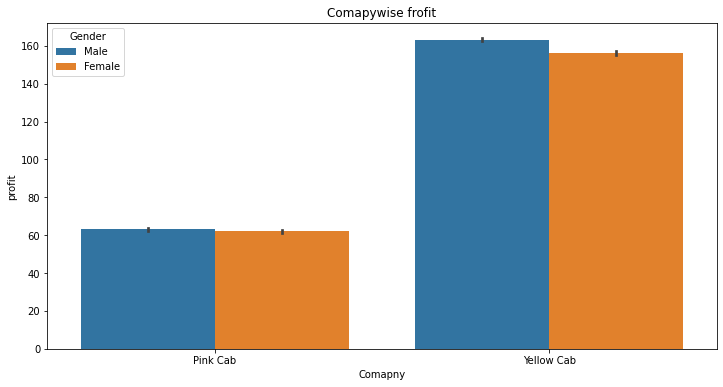

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x="Company",y="profit",hue="Gender",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//gender_wise_company_profit")
plt.show()


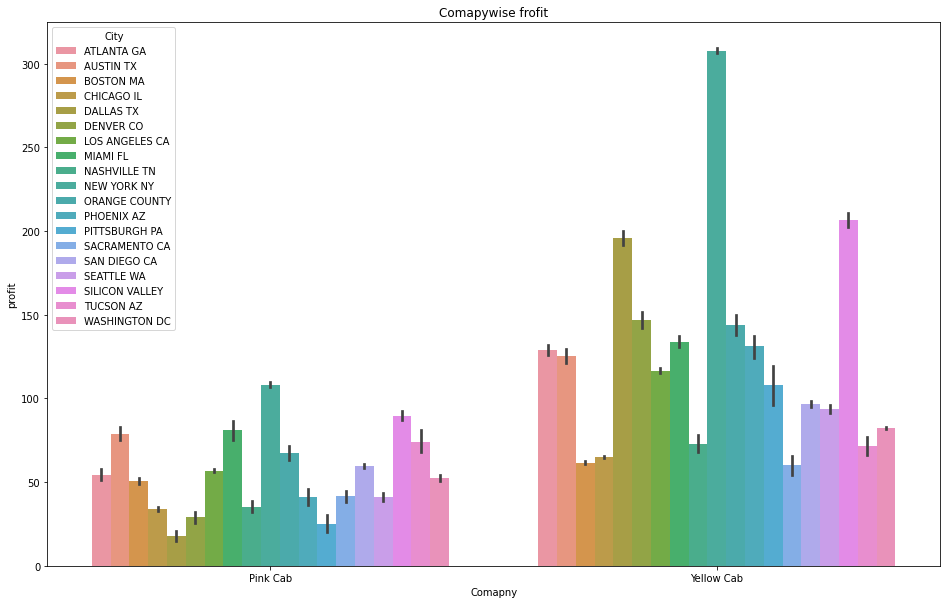

In [75]:
plt.figure(figsize=(16,10))
sns.barplot(x="Company",y="profit",hue="City",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//city_wise_company_profit")

plt.show()

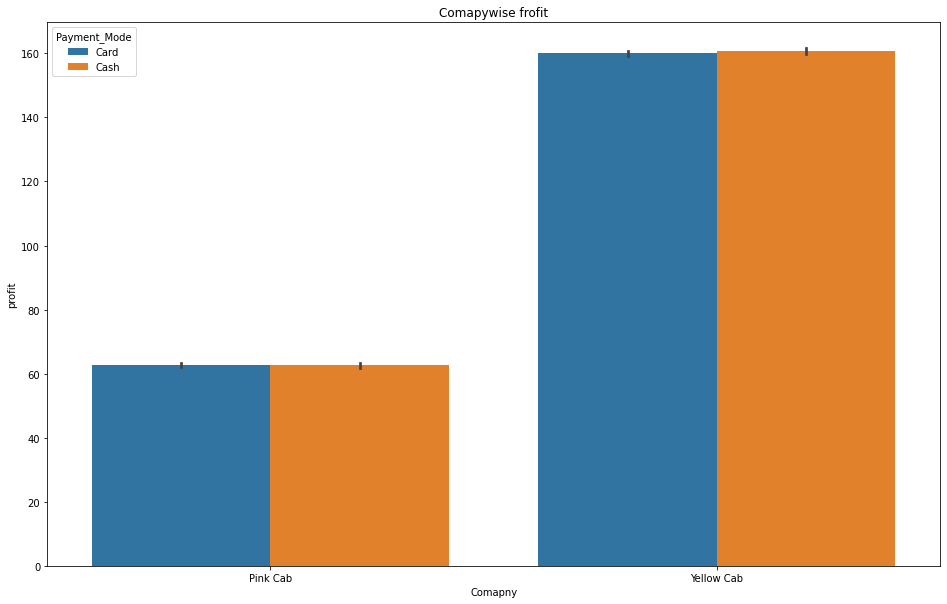

In [82]:
plt.figure(figsize=(16,10))
sns.barplot(x="Company",y="profit",hue="Payment_Mode",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//paymentMode_wise_company_profit")

plt.show()

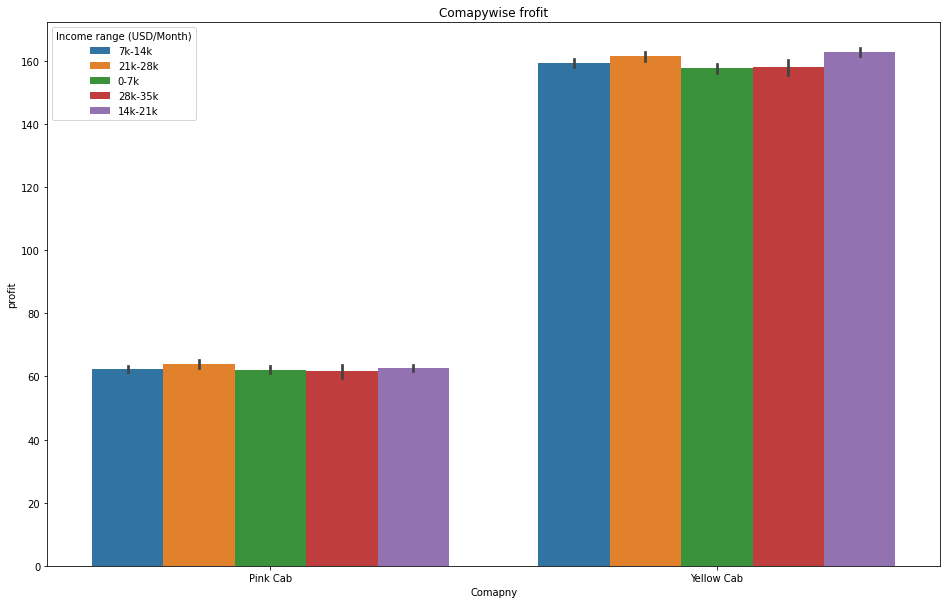

In [86]:
plt.figure(figsize=(16,10))
sns.barplot(x="Company",y="profit",hue="Income range (USD/Month)",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//Income_wise_company_profit")

plt.show()

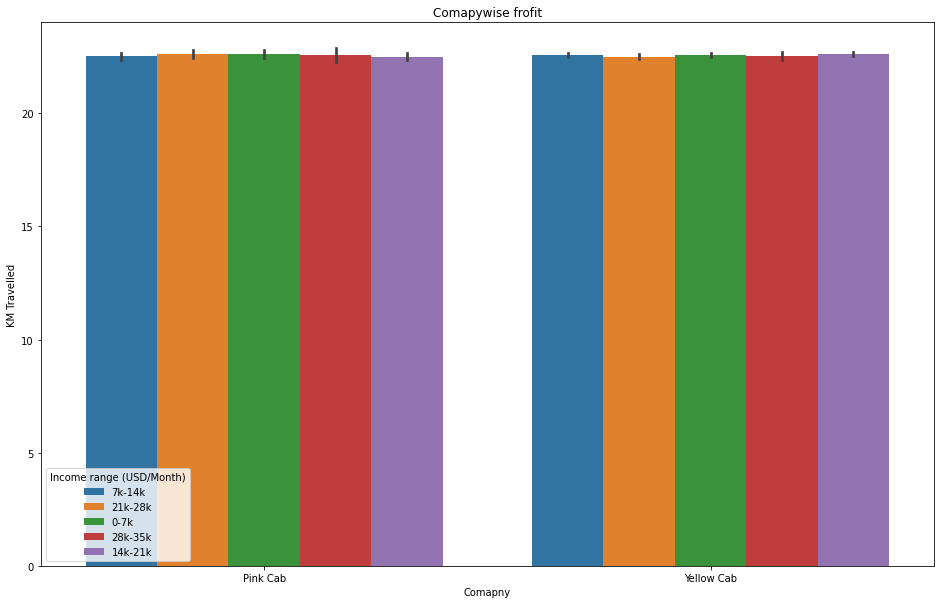

In [88]:
plt.figure(figsize=(16,10))
sns.barplot(x="Company",y="KM Travelled",hue="Income range (USD/Month)",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//Income_wise_company_wise_KM_travelled")

plt.show()

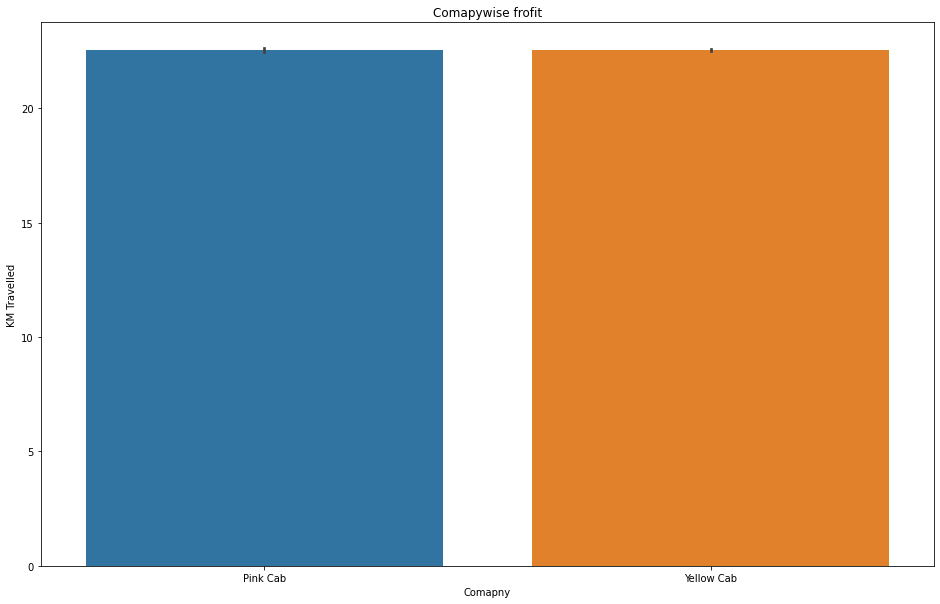

In [89]:
plt.figure(figsize=(16,10))
sns.barplot(x="Company",y="KM Travelled",data=dfCustTransCabCityMerger)
plt.xlabel("Comapny")
plt.title("Comapywise frofit")
plt.savefig("Graphs//company_wise_KM_travelled")

plt.show()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
dfCity = pd.read_csv("dataset/City.csv")

In [14]:
dfCity.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,PHOENIX AZ,"418,859","6,133"
freq,1,1,1


In [15]:
dfCity.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [32]:
dfCabCustmer = pd.merge(cabData_df,dfCustomer,on="Customer ID")

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>